### ARGENTINA

In [3]:
import pandas as pd

In [19]:
df_Argentina = pd.read_csv(r'..\data\raw\preciosArgentina.csv')
df_Argentina.head()

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
0,2025-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,19,Gas Oil Grado 2,2,Diurno,1182.0,2025-01-06 10:10:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
1,2025-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,19,Gas Oil Grado 2,3,Nocturno,1182.0,2025-01-06 10:10:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
2,2025-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,21,Gas Oil Grado 3,2,Diurno,1431.0,2025-01-06 10:10:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
3,2025-01,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,21,Gas Oil Grado 3,3,Nocturno,1431.0,2025-01-06 10:10:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
4,2024-12,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,6,GNC,2,Diurno,464.9,2024-12-24 13:44:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."


### URUGUAY

In [17]:
import os
ruta = os.getcwd()
ruta

'c:\\Users\\dispe\\OneDrive\\Documentos\\CLASES\\Proyecto Precios Combustibles Latam\\Proyecto-Combustibles-Latam\\notebooks'

In [22]:
df_Uruguay = pd.read_csv(r'..\data\raw\preciosUruguay.csv')
df_Uruguay.head()

,0,1,2,3,4,5,6
0,Fecha,Super 95-30S,Premium 97 30S,Gasoil 50S,Gasoil 10S,Queroseno,Supergás
1,01/04/2025,7854,8108,5017,5810,5463,8846
2,01/03/2025,7854,8108,5092,5810,5580,8846
3,01/02/2025,7854,8108,5092,5810,5580,8846
4,01/01/2025,7854,8108,4992,5810,5580,8846


### PERÚ

In [23]:
import pdfplumber

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


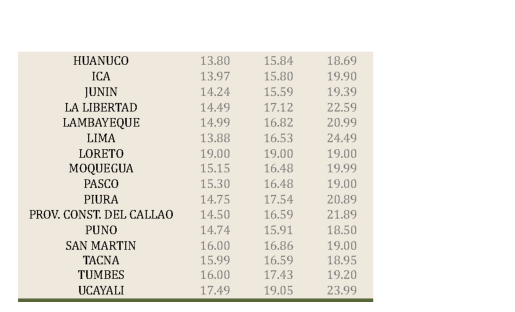

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


In [199]:
import matplotlib.pyplot as plt
pdf_path = r'..\data\raw\preciosPeru.pdf'
bbox = (120, 30, 595, 310)

with pdfplumber.open(pdf_path) as file:
    page = file.pages[3]
    
    cropped = page.within_bbox(bbox)
    
    img = cropped.to_image(resolution=150)
    img.debug_tablefinder()
    plt.imshow(img.original)
    plt.axis('off')
    plt.show()


In [ ]:
# CÓDIGO TOTALMENTE FUNCIONAL PARA LA PRIMER TABLA DE PÁGINA 3

# Ruta del archivo
pdf_path = r'..\data\raw\preciosPeru.pdf'
all_tables = []
bbox = (100, 180, 580, 532)


# Abrir el PDF
with pdfplumber.open(pdf_path) as file:
        page = file.pages[2] # Elegir la página donde está la tabla o tablas
        cropped = page.within_bbox(bbox)
        table = cropped.extract_tables() # Extraer tabla

# Usamos la primera tabla detectada
tabla_cruda = table[0]

# Unimos las dos primeras filas para armar los nombres de columna
header_raw = tabla_cruda[0]
header_extra = tabla_cruda[1]

# Combinar columnas: si hay datos en ambas filas, se concatenan
headers = ['Departamento', 'Mín. de Venta', 'Promedio de Venta', 'Máx. de Venta']
for h1, h2 in zip(header_raw, header_extra):
    h1_clean = h1.strip() if h1 else ''
    h2_clean = h2.strip() if h2 else ''
    combined = f'{h1_clean} {h2_clean}'.strip()
    headers.append(combined)

header = ['Departamento', 'Mín. de Venta', 'Promedio de Venta', 'Máx. de Venta']

# Resto de los datos
data = tabla_cruda[2:]

# Filtrar columnas correctas por posición
data_filtered = []
for row in data:
    try: 
        data_filtered.append([row[1], row[4], row[7], row[10]])
    except IndexError:
        continue
    
df = pd.DataFrame(data_filtered, columns=header)
df.head(100)

In [ ]:
# INTENTO DE CÓDIGO PARA EXTRAER TABLAS DE CADA PÁGINA DE MANERA ÓPTIMA

bboxes_por_tabla = [
    (100, 180, 580, 532), # Tabla 1 - Página 3
    (120, 600, 595, 800), # Tabla 2 - Página 3
    (120, 30, 595, 310),  # Tabla 2.2 - Página 4 (No hay tabla 3)
    (120, 460, 595, 565), # Tabla 4 - Página 4
    (120, 650, 595, 740), # Tabla 5 - Página 4
    (120, 290, 595, 685), # Tabla 7 - Página 5
    (120, 220, 595, 610), # Tabla 6 - Página 6
    (120, 700, 595, 800), # Tabla 7 - Página 6
    (120, 50, 595, 345), # Tabla 7.1 - Página 7
    (120, 435, 595, 840), # Tabla 8 - Página 7
    (120, 55, 595, 165), # Tabla 8.1 - Página 8
    (120, 255, 595, 485) # Tabla 9 - Página 8
]

paginas = [2, 2, 3, 3, 3, 4, 5, 5, 6, 6, 7, 7]
tablas_finales = []

with pdfplumber.open(pdf_path) as file:
    for i, bbox in enumerate(bboxes_por_tabla):
        page = file.pages[paginas[i]]
        cropped = page.within_bbox(bbox)
        table = cropped.extract_table()
        
        if table and len(table) > 2:
            header_raw = table[0]
            header_extra = table[1]
            header = ['Departamento', 'Mín. de Venta', 'Promedio de Venta', 'Máx. de Venta']
            
            data = []
            for row in table[2:]:
                try:
                    data.append([row[1], row[4], row[7], row[10]])
                except IndexError:
                    continue
            
            df = pd.DataFrame(data, columns=header)
            tablas_finales.append(df)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


In [201]:
for i, df in enumerate(tablas_finales):
    print(f'\n == TABLA == {i+1}:\n')
    print(df)


 == TABLA == 1:

               Departamento Mín. de Venta Promedio de Venta Máx. de Venta
0                  AMAZONAS         13.28             14.63         17.50
1                    ANCASH         12.55             14.04         18.00
2                  APURIMAC         14.39             15.33         18.50
3                  AREQUIPA         13.09             14.73         22.69
4                  AYACUCHO         13.49             14.52         18.20
5                 CAJAMARCA         13.60             15.18         18.20
6                     CUSCO         12.98             15.07         18.75
7              HUANCAVELICA         13.80             15.74         17.20
8                   HUANUCO         12.80             14.85         19.50
9                       ICA         12.89             14.48         17.20
10                    JUNIN         12.99             14.70         17.00
11              LA LIBERTAD         13.19             15.42         20.49
12               LAM